# Gradient descent for ridge regression

The goal of this exercise is to implement gradient descent, stochastic gradient descent and mini-batch gradient descent methods for ridge regression. We re going to implement them by defining the necessary functions, and then demonstrate their performance using a specific dataset, and appropriate visualization techniques.

## Import Libraries

In [1]:
# For large and multi-dimensional arrays
import numpy as np
# For data manipulation and analysis
import pandas as pd
# For data vizualization 
import matplotlib.pyplot as plt
# For ML algorithms
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

## Define necessary functions

First, we want a function to compute the predictions that are created for a given dataset.

In [2]:
def predict(X, theta):
  return np.dot(X, theta[0:8]) + theta[8]

We also need a function to compute the gradient of the error

In [3]:
def gradient(X, y, theta): 
    h = np.dot(X, theta) 
    grad = (2 / X.shape[0]) * np.dot(X.transpose(), (h - y)) 
    
    return grad 

We also need a function to compute the Mean Squared Error (MSE), which is defined as: $$MSE(w) = \frac{1}{m}\sum_{i=1}^{m}(h_w(x^{(i)}) - y^{(1)})^2$$



In [4]:
def cost(X, y, theta): 
    h = np.dot(X, theta) 
    J = np.dot((h - y).transpose(), (h - y)) 
    J /= X.shape[0]
    return J[0]

## Different kinds of gradient descent

We are going to implement 3 different types of gradient descent, in order to check the difference in their behaviors when it comes down to correctly classifying a dataset. We are going to define 3 functions, that perform:
 - Gradient Descent
 - Stochastic Gradient Descent
 - Mini-Batch Gradient Descent

### Gradient descent

The most simple method of implementing gradient descent, is to iterate the whole dataset in each loop. 

Convergence to the unique global minimum is guaranteed (as long as we pick η small enough) but may be very slow: we have to cycle through all the training data for every step, and there may be many steps.

In [5]:
# function to perform gradient descent
def gradientDescent(X, y, learning_rate = 0.1, steps = 1000): 
    X = np.c_[X, np.ones(X.shape[0])] #add a column of ones to X for the bias term
    theta = np.zeros((X.shape[1], 1)) #create inital weights w0, w1..wd
    error_list = []  
    for s in range(steps):
        theta = theta - learning_rate * gradient(X, y, theta) 
        error_list.append(cost(X, y, theta)) #useful for plotting changes when using different batch sizes
  
    return theta, error_list 

### Stochastic Gradient descent

In this case, we consider only a single training instance at a time (chosen randomly), taking a step after each one using the following equation which is appropriate for a single training instance (x, y): 
$$ w_i \leftarrow w_i - \eta(h_w(x)-y)x_i$$

In order to define this method, we must first define the `learning_schedule`, which  determines the learning rate at each iteration

In [6]:
def learning_schedule(t, t_0, t_1):
    return t_0 / (t + t_1)

Now let's define the stochastic gradient descent function

In [7]:
def stochasticGradientDescent(X, y, learning_rate = 0.1, steps = 1000, epochs = 50):
    X = np.c_[X, np.ones(X.shape[0])] #add a column of ones to X for the bias term
    theta = np.zeros((X.shape[1], 1)) #create inital weights w0, w1..wd
    error_list = []
    t0 = 5 # learning_schedule hyperparameters
    t1 = 50 
    m = X.shape[0]
    for e in range(epochs):
        for s in range(steps):
            random_index = np.random.randint(m - 1)
            xi = X[random_index : random_index + 1]
            yi = y[random_index : random_index + 1]            
            eta = learning_schedule(e * m + s, t0, t1)
            theta = theta - eta * gradient(xi, yi, theta)
        error_list.append(cost(X, y, theta))
    return theta, error_list

### Mini-Batch Gradient descent

In this case, at each step, instead of computing the gradients based on the full training set (as in batch gradient descent) or based on just one instance (as in stochastic gradient descent), mini-batch gradient descent computes the gradients on small random sets of instances called mini-batches.

In [8]:
def miniBatchGradientDescent(X, y, learning_rate = 0.1, steps = 1000, epochs = 50, batch_size = 10):
    X = np.c_[X, np.ones(X.shape[0])] #add a column of ones to X for the bias term
    theta = np.zeros((X.shape[1], 1)) #create inital weights w0, w1..wd
    error_list = []
    t0 = 5 # learning_schedule hyperparameters
    t1 = 50 
    m = X.shape[0]
    for e in range(epochs):
        for s in range(steps):
            random_index = np.random.randint(m - batch_size)
            xi = X[random_index : random_index + batch_size]
            yi = y[random_index : random_index + batch_size]            
            eta = learning_schedule(e * m + s, t0, t1)
            theta = theta - eta * gradient(xi, yi, theta)
        error_list.append(cost(X, y, theta))
    return theta, error_list

## Demonstration of the algorithms

We are going to use the `California Housing Dataset`, in order to demonstrate the algorithms that we implemented

### Import the dataset

We are going to import the dataset...

In [9]:
df = pd.read_csv("HousingData.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   MedInc              16512 non-null  float64
 2   HouseAge            16512 non-null  float64
 3   AveRooms            16512 non-null  float64
 4   AveBedrms           16512 non-null  float64
 5   Population          16512 non-null  float64
 6   AveOccup            16512 non-null  float64
 7   Latitude            16512 non-null  float64
 8   Longitude           16512 non-null  float64
 9   Median House Value  16512 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.3 MB


...and take a look at its columns

In [10]:
df.head()

,Unnamed: 0,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Median House Value
0,0,3.9816,27.0,4.928668,1.122476,3009.0,4.049798,33.73,-117.93,1.795
1,1,3.4531,23.0,4.021339,1.099338,2511.0,1.847682,34.14,-118.13,2.109
2,2,6.3942,4.0,5.681272,1.095774,5613.0,2.176425,37.78,-121.95,3.567
3,3,2.2243,32.0,5.685221,1.009597,1542.0,2.959693,38.69,-121.45,0.892
4,4,3.0217,9.0,5.006324,1.071146,3265.0,2.581028,37.69,-121.04,1.609


### Splitting 

We are going to split the dataset into training and testing ones

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[1:-1]], df['Median House Value'], test_size=.2)

# reconfigure the shape of the Y datasets
y_test = y_test.to_numpy().reshape(-1,1)
y_train = y_train.to_numpy().reshape(-1,1)

### Scaling

In order for our algorithms to work correctly, we must ensure that our features are of the same scale. We can do this easily by using `sklearn`'s methods

In [12]:
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

Let's take a look at the distribution of our first feature's data in our dataset

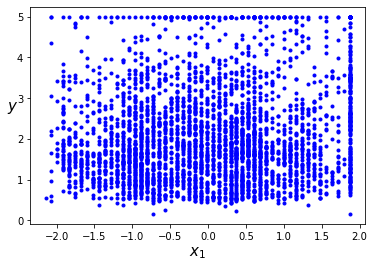

In [13]:
plt.plot(X_test_scaled[:,1], y_test, 'b.')
plt.xlabel("$x_1$", fontsize=15)
plt.ylabel("$y$", rotation=0, fontsize=15)
plt.show()

## Gradient Descent

Let's run the `gradientDescent` algorithm for our dataset. It will return the best weights found, as well as a list containing the error in every iteration. We are going to select the learning rate to be `0.001`, and see what results we are getting

In [14]:
best_theta, error = gradientDescent(X_train_scaled, y_train, 0.01, steps = 100)

In [15]:
print(best_theta)

[[ 6.68004437e-01]
 [ 1.54846968e-01]
 [ 5.32575079e-02]
 [-3.91052345e-02]
 [ 1.29441656e-03]
 [-3.79859494e-02]
 [-1.81497179e-01]
 [-1.34106006e-01]
 [ 1.78813654e+00]]


Let's plot the error as the iterations increase. It should be getting less with each iteration. The algorithm will not be working correctly if any other kind of plot appears

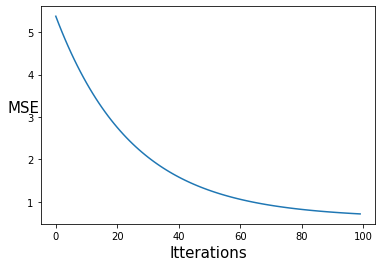

In [16]:
y_pred = predict(X_train_scaled, best_theta)
plt.plot(error)
plt.xlabel("Itterations", fontsize=15)
plt.ylabel("MSE", rotation=0, fontsize=15)
plt.show()

We  see that the error decreases as the iterations increase. Thus, our model is working correctly.

### Learning curves

Another way to check our model's quality is to look at the learning curves: these are plots of the model's performance on the training set and the validation set as a function of the training set size (or the training iteration).

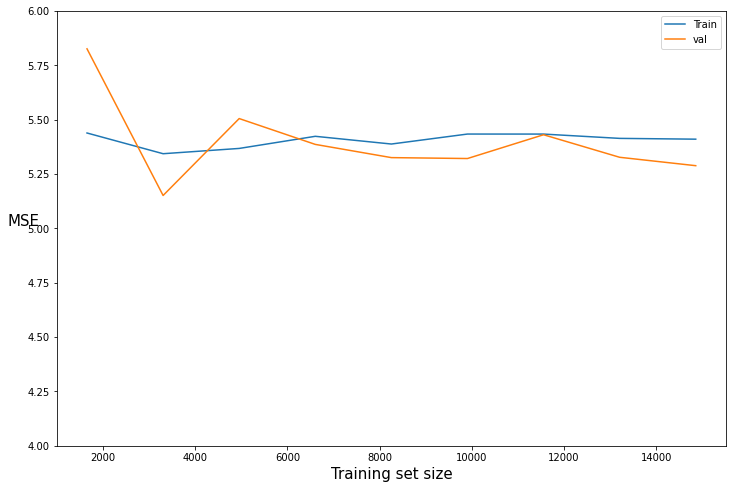

In [17]:
# define the sample sizesthat we'll be taking from the dataset
sizes = [i * (len(df) // 10) for i in range (1,10)]

# keep track of the errors
err_test_list = []
err_train_list = []

# iterate all the different sizes
for size in sizes:
    # create the sets, based on what we did earlier
    df_trimmed = df.sample(n = size)
    
    X_train, X_test, y_train, y_test = train_test_split(df_trimmed[df_trimmed.columns[1:-1]], df_trimmed['Median House Value'], test_size=.2)
    
    y_test = y_test.to_numpy().reshape(-1,1)
    y_train = y_train.to_numpy().reshape(-1,1)
    
    X_train_scaled = preprocessing.scale(X_train)
    X_test_scaled = preprocessing.scale(X_test)
        
    # rum the model to get the train error array
    best_theta, error_train = gradientDescent(X_train_scaled, y_train, 0.00001, steps = 1000)
    # append its last value to the list
    err_train_list.append(error_train[-1])
    
    
    X_test_scaled = np.c_[X_test_scaled, np.ones(X_test_scaled.shape[0])] #add a column of ones to X for the bias term
    err_test = cost(X_test_scaled, y_test, best_theta)

    err_test_list.append(err_test)


#plot the 2 graphs
plt.figure(figsize = (12,8))
plt.plot(sizes, err_train_list, label='Train')
plt.plot(sizes, err_test_list, label="val")
plt.legend(loc='best')
plt.gca().set_ylim([4,6])
plt.xlabel("Training set size", fontsize=15)
plt.ylabel("MSE", rotation=0, fontsize=15)
plt.show()

As we can see, our model does not meet the criteria for underfitting or overfitting according to the theory

## Stochastic Gradient Descent

This time, we are going to set the learning rate to `0.00001`, and see what results we are getting

In [18]:
best_theta, error = stochasticGradientDescent(X_train_scaled, y_train, 0.001, epochs = 50, steps = 100)

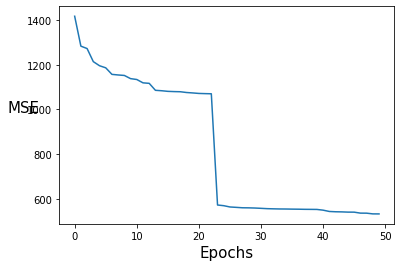

In [19]:
plt.plot(error)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("MSE", rotation=0, fontsize=15)
plt.show()

As expected, as epochs increase, our error gets lower

### Learning Curves

Let's now check the learning curves for our Stochastic model, in order to locate any underfitting or overfitting

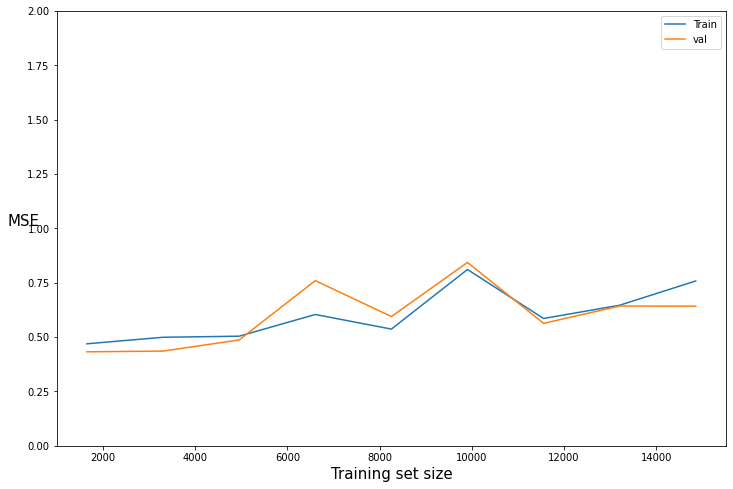

In [33]:
# define the sample sizesthat we'll be taking from the dataset
sizes = [i * (len(df) // 10) for i in range (1,10)]

# keep track of the errors
err_test_list = []
err_train_list = []

# iterate all the different sizes
for size in sizes:
    # create the sets, based on what we did earlier
    df_trimmed = df.sample(n = size)
    
    X_train, X_test, y_train, y_test = train_test_split(df_trimmed[df_trimmed.columns[1:-1]], df_trimmed['Median House Value'], test_size=.2)
    
    y_test = y_test.to_numpy().reshape(-1,1)
    y_train = y_train.to_numpy().reshape(-1,1)
    
    X_train_scaled = preprocessing.scale(X_train)
    X_test_scaled = preprocessing.scale(X_test)
        
    # rum the model to get the train error array
    best_theta, error_train = stochasticGradientDescent(X_train_scaled, y_train, 0.001, epochs = 50, steps = 100)
    # append its last value to the list
    err_train_list.append(error_train[-1])
    
    
    X_test_scaled = np.c_[X_test_scaled, np.ones(X_test_scaled.shape[0])] #add a column of ones to X for the bias term
    err_test = cost(X_test_scaled, y_test, best_theta)

    err_test_list.append(err_test)


#plot the 2 graphs
plt.figure(figsize = (12,8))
plt.plot(sizes, err_train_list, label='Train')
plt.plot(sizes, err_test_list, label="val")
plt.legend(loc='best')
plt.gca().set_ylim([0,2])
plt.xlabel("Training set size", fontsize=15)
plt.ylabel("MSE", rotation=0, fontsize=15)
plt.show()

Once again, our model does not meet the criteria for underfitting or overfitting according to the theory

## Mini-Batch Gradient Descent

Finally, we are going to test our mini-batch model, by again setting the learning rate to `0.0001`, and see what results we are getting

In [21]:
best_theta, error = miniBatchGradientDescent(X_train_scaled, y_train, 0.001, epochs = 50, steps = 10, batch_size = 50)

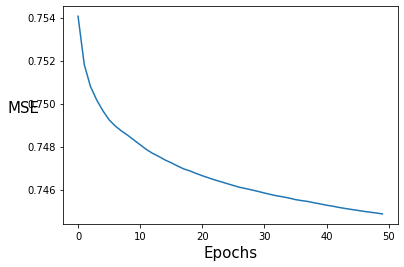

In [22]:
plt.plot(error)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("MSE", rotation=0, fontsize=15)
plt.show()

Let's now check the learning curves for our mini-batch model, in order to locate any underfitting or overfitting

### Learning Curves

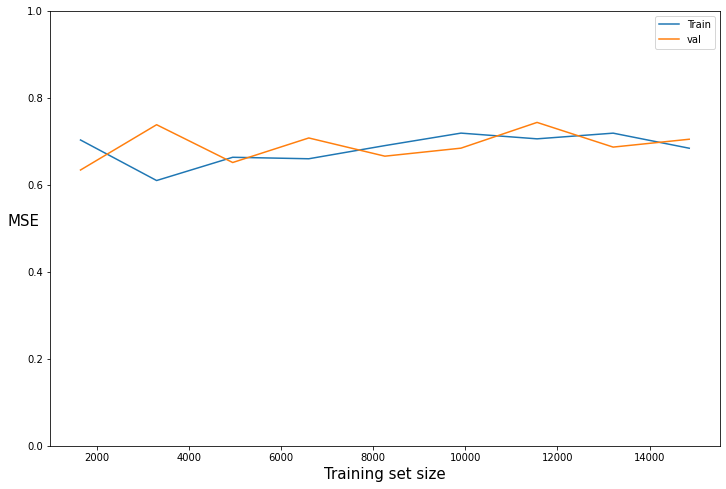

In [23]:
# define the sample sizesthat we'll be taking from the dataset
sizes = [i * (len(df) // 10) for i in range (1,10)]

# keep track of the errors
err_test_list = []
err_train_list = []

# iterate all the different sizes
for size in sizes:
    # create the sets, based on what we did earlier
    df_trimmed = df.sample(n = size)
    
    X_train, X_test, y_train, y_test = train_test_split(df_trimmed[df_trimmed.columns[1:-1]], df_trimmed['Median House Value'], test_size=.2)
    
    y_test = y_test.to_numpy().reshape(-1,1)
    y_train = y_train.to_numpy().reshape(-1,1)
    
    X_train_scaled = preprocessing.scale(X_train)
    X_test_scaled = preprocessing.scale(X_test)
        
    # rum the model to get the train error array
    best_theta, error_train = best_theta, error = miniBatchGradientDescent(X_train_scaled, y_train, 0.001, epochs = 50, steps = 10, batch_size = 50)
    # append its last value to the list
    err_train_list.append(error_train[-1])
    
    
    X_test_scaled = np.c_[X_test_scaled, np.ones(X_test_scaled.shape[0])] #add a column of ones to X for the bias term
    err_test = cost(X_test_scaled, y_test, best_theta)

    err_test_list.append(err_test)


#plot the 2 graphs
plt.figure(figsize = (12,8))
plt.plot(sizes, err_train_list, label='Train')
plt.plot(sizes, err_test_list, label="val")
plt.gca().set_ylim([0,1])
plt.legend(loc='best')
plt.xlabel("Training set size", fontsize=15)
plt.ylabel("MSE", rotation=0, fontsize=15)
plt.show()